In [2]:
%matplotlib inline
#%matplotlib widget


In [3]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [4]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
        

In [5]:
tts = np.arange(10)
z = pd.DataFrame({'t':tts,'x':[0]*len(tts)})
xy = pd.DataFrame({'t':[0,1,4,7,9],'x':[1,1,1,1,1]},index=[0,1,4,7,9])
print(xy)
test=pd.Series(np.ones(len(tts)))
#cond = ~z['t'].isin(xy.t)
z['x']=xy.x
z.loc[cond,'x'] = test

z

   t  x
0  0  1
1  1  1
4  4  1
7  7  1
9  9  1


NameError: name 'cond' is not defined

In [6]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
suffix='_distances.csv'
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
close_threshold=140**2
too_close_thresh=100**2
countdf=pd.DataFrame()
#bot_nums=pd.DataFrame()
bottypes=['fronter','aligner']
for bottype in bottypes:
    relevant_table=expSumPassive[(expSumPassive['bottype']==bottype)]
    bot_num_array=pd.Series([]);
    bot_num_before=0
    bot_iteration=0
    for index,row in relevant_table.iterrows():
        FileName=row.locatingFileNamePack
        bot_num_current=row.bots
        if bot_num_current==bot_num_before:
            
            bot_iteration=bot_iteration+1
        else:
            bot_iteration=0
        #bot_num_array[index]=row.bots
        print(FileName)
        srtarting_frame=read_time(row.start_min)
        data=pd.read_csv(passive_path+'\\'+FileName+suffix,index_col=0)
        cond = (data.distance_sq<=close_threshold)&(data.distance_sq>too_close_thresh)
        dataCond = data[cond]
        #data['hascond']=np.where(cond,True,False)
        dataCG=dataCond.groupby(['frame'], as_index=True).count()
        dataCG.to_csv(passive_path+'\\dataCG_test.csv')
        data_count=pd.DataFrame(data={'frame': list(range(0,int(data.frame.iloc[-1])))})
        data_count['kissing_count']=dataCG.distance_sq
        data_count['kissing_count'] =data_count['kissing_count'].fillna(0)
        data_count_relevant=data_count.iloc[srtarting_frame:len(data_count)].reset_index()

        data_count_relevant['iteration']=np.ones(len(data_count_relevant))*bot_iteration
        data_count_relevant['bot_num']=np.ones(len(data_count_relevant))*bot_num_current
        bottype_array=[bottype]*len(data_count_relevant)
        data_count_relevant['bot_type']=bottype_array
        countdf=pd.concat([countdf,data_count_relevant],axis=0)
        bot_num_before=bot_num_current
    #bot_nums=pd.concat([bot_nums,bot_num_array.rename(bottype)],axis=1)
#countdf.fillna(0,inplace=True)
countdf.to_csv(passive_path+'\\countdf_test.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_39868\214231008.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bot_num_array=pd.Series([]);


fronter_N001_D028_C0556.MP4_loc.csv
fronter_N001_D028_C0555.MP4_loc.csv
fronter_N001_D028_C0554.MP4_loc.csv
fronter_N001_D028_C0553.MP4_loc.csv
fronter_N004_D028_C0560.MP4_loc.csv
fronter_N004_D028_C0559.MP4_loc.csv
fronter_N004_D028_C0558.MP4_loc.csv
fronter_N004_D028_C0557.MP4_loc.csv
fronter_N008_D028_C0567.MP4_loc.csv
fronter_N008_D028_C0566.MP4_loc.csv
fronter_N008_D028_C0565.MP4_loc.csv
fronter_N008_D028_C0563.MP4_loc.csv
fronter_N008_D028_C0562.MP4_loc.csv
fronter_N016_D028_C0571.MP4_loc.csv
fronter_N016_D028_C0570.MP4_loc.csv
fronter_N016_D028_C0569.MP4_loc.csv
fronter_N016_D028_C0568.MP4_loc.csv
fronter_N053_D028_C0505.MP4_loc.csv
fronter_N053_D028_C0506.MP4_loc.csv
fronter_N053_D028_C0507.MP4_loc.csv
fronter_N053_D028_C0509.MP4_loc.csv
fronter_N021_D028_C0490.MP4_loc.csv
fronter_N021_D028_C0491.MP4_loc.csv
fronter_N021_D028_C0492.MP4_loc.csv
fronter_N021_D028_C0493.MP4_loc.csv


C:\Users\User\AppData\Local\Temp\ipykernel_39868\214231008.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bot_num_array=pd.Series([]);


aligner_N001_D028_C0575.MP4_loc.csv
aligner_N001_D028_C0574.MP4_loc.csv
aligner_N001_D028_C0573.MP4_loc.csv
aligner_N001_D028_C0572.MP4_loc.csv
aligner_N004_D028_C0580.MP4_loc.csv
aligner_N004_D028_C0579.MP4_loc.csv
aligner_N004_D028_C0578.MP4_loc.csv
aligner_N004_D028_C0577.MP4_loc.csv
aligner_N004_D028_C0576.MP4_loc.csv
aligner_N008_D028_C0587.MP4_loc.csv
aligner_N008_D028_C0586.MP4_loc.csv
aligner_N008_D028_C0585.MP4_loc.csv
aligner_N008_D028_C0584.MP4_loc.csv
aligner_N008_D028_C0583.MP4_loc.csv
aligner_N008_D028_C0581.MP4_loc.csv
aligner_N016_D028_C0591.MP4_loc.csv
aligner_N016_D028_C0590.MP4_loc.csv
aligner_N016_D028_C0589.MP4_loc.csv
aligner_N016_D028_C0588.MP4_loc.csv
aligner_N053_D028_C0510.MP4_loc.csv
aligner_N053_D028_C0511.MP4_loc.csv
aligner_N053_D028_C0512.MP4_loc.csv
aligner_N053_D028_C0513.MP4_loc.csv
aligner_N021_D028_C0494.MP4_loc.csv
aligner_N021_D028_C0495.MP4_loc.csv
aligner_N021_D028_C0497.MP4_loc.csv
aligner_N021_D028_C0498.MP4_loc.csv


In [7]:
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
fronters_count=countdf[(countdf['bot_type']=='fronter')].reset_index()
fronters_count.to_csv(passive_path+'\\fronters_count.csv')
aligners_count=countdf[(countdf['bot_type']=='aligner')].reset_index()
aligners_count.to_csv(passive_path+'\\aligners_count.csv')


In [8]:
fronter_mean=fronters_count.groupby(by=['bot_num','level_0']).mean()
print(fronter_mean)

                    index     frame  kissing_count  iteration
bot_num level_0                                              
1.0     0          281.25    281.25            1.0        1.5
        1          282.25    282.25            1.0        1.5
        2          283.25    283.25            1.0        1.5
        3          284.25    284.25            1.0        1.5
        4          285.25    285.25            1.0        1.5
...                   ...       ...            ...        ...
53.0    22682    23432.00  23432.00            4.5        2.5
        22683    23433.00  23433.00            4.5        2.5
        22684    23434.00  23434.00            4.0        2.5
        22685    23410.00  23410.00            3.0        3.0
        22686    23411.00  23411.00            3.0        3.0

[197878 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_39868\1051926895.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(by=['bot_num','level_0']).mean()


In [9]:
aligners_mean=aligners_count.groupby(by=["bot_num","level_0"]).mean()
print(aligners_mean)

                   index    frame  kissing_count  iteration
bot_num level_0                                            
1.0     0          250.0    250.0            1.0        1.5
        1          251.0    251.0            1.0        1.5
        2          252.0    252.0            1.0        1.5
        3          253.0    253.0            1.0        1.5
        4          254.0    254.0            1.0        1.5
...                  ...      ...            ...        ...
53.0    29716    30391.0  30391.0            1.0        3.0
        29717    30392.0  30392.0            1.0        3.0
        29718    30393.0  30393.0            1.0        3.0
        29719    30394.0  30394.0            1.0        3.0
        29720    30395.0  30395.0            1.0        3.0

[204106 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_39868\626531495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aligners_mean=aligners_count.groupby(by=["bot_num","level_0"]).mean()


In [10]:
fronter_mean=fronters_count.groupby(['bot_num','level_0']).mean()
fronter_std=fronters_count.groupby(['bot_num','level_0']).std()

aligners_mean=aligners_count.groupby(['bot_num','level_0']).mean()
aligners_std=aligners_count.groupby(['bot_num','level_0']).std()

C:\Users\User\AppData\Local\Temp\ipykernel_39868\1236069990.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['bot_num','level_0']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_39868\1236069990.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_std=fronters_count.groupby(['bot_num','level_0']).std()
C:\Users\User\AppData\Local\Temp\ipykernel_39868\1236069990.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

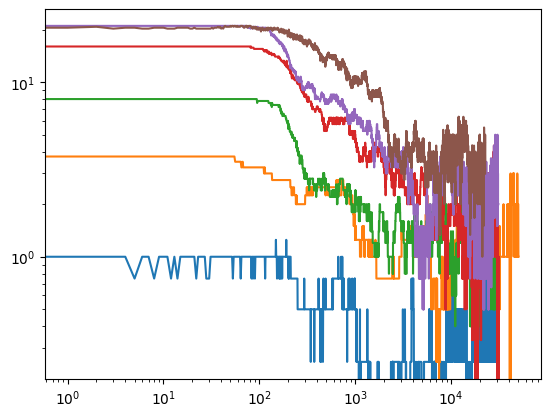

In [11]:
for i in [1,4,8,16,21,53]:
    current_data=fronter_mean.loc[i]
    #print(current_data)
    plt.loglog(current_data['kissing_count'])
#test=pd.DataFrame(fronter_mean.loc[1])


In [12]:
aligners_mean

index    frame  kissing_count  iteration
bot_num level_0                                            
1.0     0          250.0    250.0            1.0        1.5
        1          251.0    251.0            1.0        1.5
        2          252.0    252.0            1.0        1.5
        3          253.0    253.0            1.0        1.5
        4          254.0    254.0            1.0        1.5
...                  ...      ...            ...        ...
53.0    29716    30391.0  30391.0            1.0        3.0
        29717    30392.0  30392.0            1.0        3.0
        29718    30393.0  30393.0            1.0        3.0
        29719    30394.0  30394.0            1.0        3.0
        29720    30395.0  30395.0            1.0        3.0

[204106 rows x 4 columns]

In [13]:
current_data_aligners.index

NameError: name 'current_data_aligners' is not defined

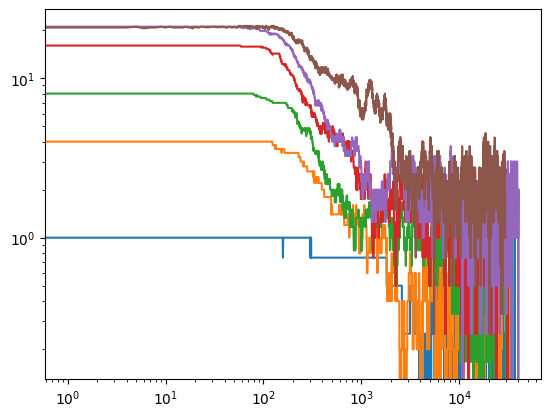

In [14]:
for j in [1,4,8,16,21,53]:
    current_data_aligners=aligners_mean.loc[j]
    #print(current_data)
    plt.loglog(current_data_aligners['kissing_count'])

AttributeError: 'DataFrame' object has no attribute 'group'

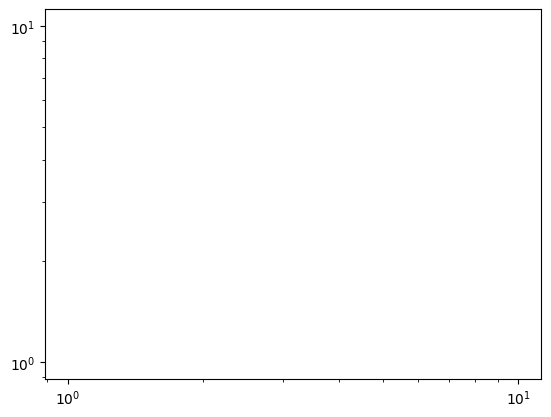

In [15]:
#plt.loglog(fronter_mean,color='olive')
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
lines = fronter_mean.group.unique()
for i in lines:
  ax.errorbar(x=list(range(0,len(fronter_mean.iloc[:,i]))),y=fronter_mean.iloc[:,i],yerr=fronter_std.iloc[:,i],ecolor='red',color='blue',alpha=0.4)  
#ax.errorbar(list(range(0,len(fronter_mean))),fronter_mean,yerr=fronter_std,ecolor='red',color='blue',alpha=0.4)
ax.errorbar(list(range(0,len(alingers_mean))),alingers_mean,color='cyan',yerr=alingers_std,ecolor='pink',alpha=0.4)
plt.axis([1E2,5E3,0.9,10])

In [45]:
start_min=expSumPassive.start_min

In [ ]:
start_min

In [1]:
plt.plot(countdf.iloc[:,0],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)

NameError: name 'plt' is not defined

## mean according to second

C:\Users\User\AppData\Local\Temp\ipykernel_18016\144213019.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0,3E4,0.9,10])


(0.6996459342373635, 30000.0, 0.9, 10.0)

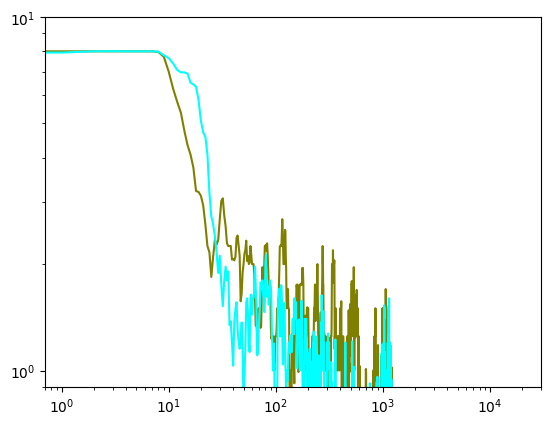

In [21]:
fronters_count_mean=fronter_mean.groupby(np.arange(len(fronters_count))//(25)).mean()
alingers_count_mean=alingers_mean.groupby(np.arange(len(alingers_count))//(25)).mean()
plt.loglog(fronters_count_mean,color='olive')
plt.loglog(alingers_count_mean,color='cyan')
plt.axis([0,3E4,0.9,10])

In [16]:
fronters_count_mean

,fronter_N008_D028_C0567.MP4_loc.csv,fronter_N008_D028_C0566.MP4_loc.csv,fronter_N008_D028_C0565.MP4_loc.csv,fronter_N008_D028_C0563.MP4_loc.csv
0,7.64,7.76,2.76,4.92
1,8.00,8.00,8.00,8.00
2,8.00,8.00,8.00,8.00
3,8.00,8.00,8.00,8.00
4,8.00,8.00,8.00,8.00
...,...,...,...,...
1262,0.00,0.00,0.00,0.00
1263,0.00,0.00,0.00,0.00
1264,0.00,0.00,0.00,0.00
1265,0.00,0.00,0.00,0.00


## mean according to mooving 

## fronters

In [202]:
fronters_count_mean_window

level_0
49       20.450
50       20.460
51       20.465
52       20.470
53       20.485
          ...  
22682     4.390
22683     4.400
22684     4.400
22685     4.380
22686     4.360
Name: kissing_count, Length: 22638, dtype: float64

302.76
343.88
135.68
334.12
386.72
588.56


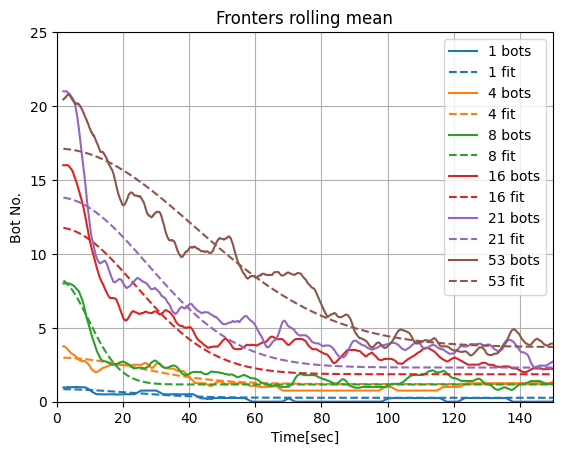

In [36]:
I=25*2
path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
fig = plt.figure()
ax = plt.axes()
#ax.set_xscale("log")
Ns = [1,4,8,16,21,53]
ksss_fron = []
ksss_err_fron=[]
half_time_fron=[]
half_time_err_fron=[]
data_fit=pd.DataFrame()
for i in Ns:
#for i in [4]:
    current_data=fronter_mean.loc[i]
    current_data_std=fronter_std.loc[i]
    fronters_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    fronters_count_mean_window=fronters_count_mean_window.dropna()
    t=(fronters_count_mean_window.index.values)/25
    #x=np.arange(t[-1])/25
    p0=np.array([i,80,2])
    popt,pcov = sc.optimize.curve_fit(expShift,t,fronters_count_mean_window,p0=p0)
    perr = np.sqrt(np.diag(pcov))
    corr=np.corrcoef(pcov,rowvar=True)
    #print(fronters_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(t,fronters_count_mean_window,label='{:d} bots'.format(i),color=color)
    plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
    cond_half=fronters_count_mean_window<=(i/2)
    cond_half_data=fronters_count_mean_window[cond_half]
    t_half_life=popt[1]*np.sqrt(np.log(2))
    
    kissingStart = int(t_half_life*25*3)
    kissingStop = int(t_half_life*25*12)
    print(kissingStop/25)
    Kss_data=fronters_count_mean_window.iloc[kissingStart:kissingStop]
    ksss_fron.append(Kss_data.mean())
    ksss_err_fron.append(Kss_data.std()/2)
    half_time_fron.append(t_half_life)
    half_time_err_fron.append(perr[1]*np.sqrt(np.log(2)))
    file_path=path+'\\results\\fronters\\{}_bots'.format(i)
    isExist = os.path.exists(file_path)
    if not isExist:

   # Create a new directory because it does not exist
        os.makedirs(file_path)
    data_fit['t']=t
    data_fit['fronters_count']=fronters_count_mean_window
    data_fit['fit']=expShift(t,*popt)
    data_fit.to_csv(file_path+'\\data_fit.csv'.format(i))
    popt.tofile(file_path+'\\popt.csv'.format(i))
    p0.tofile(file_path+'\\p0.csv'.format(i))
    pcov.tofile(file_path+'\\pcov.csv'.format(i))
    corr.tofile(file_path+'\\corr.csv'.format(i))
    data_fit=pd.DataFrame()
ax.legend()
plt.title('Fronters rolling mean')
plt.xlabel('Time[sec]')
plt.ylabel('Bot No.')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1.5E2,0,25])
plt.grid()

NameError: name 'ksss' is not defined

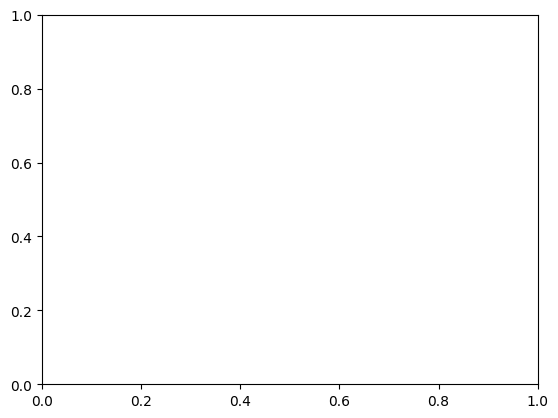

In [21]:
fig = plt.figure()
ax = plt.axes()
ksss = np.array(ksss)
Ns = np.array(Ns)
ksss_err=np.array(ksss_err)
ax.errorbar(x=Ns,y=ksss,yerr=ksss_err)


NameError: name 'fit' is not defined

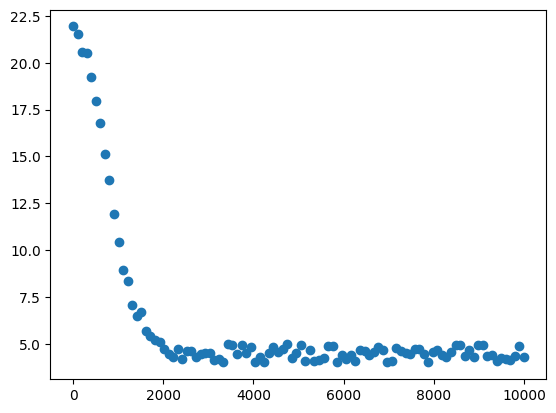

In [22]:
A, tau, k = 17, 1000, 4
t=np.linspace(0,10000,100)
kiss = expShift(t,A,tau,k)+np.random.rand(len(t))*1
plt.plot(t,kiss,'o')

popt,pcov = sc.optimize.curve_fit(expShift,t,kiss,p0=[10,2000,2])
plt.plot(t,expShift(t,*fit),'x')

In [23]:
fit

NameError: name 'fit' is not defined

## aligners

1104.64
279.04
160.16
159.16
144.68
537.56


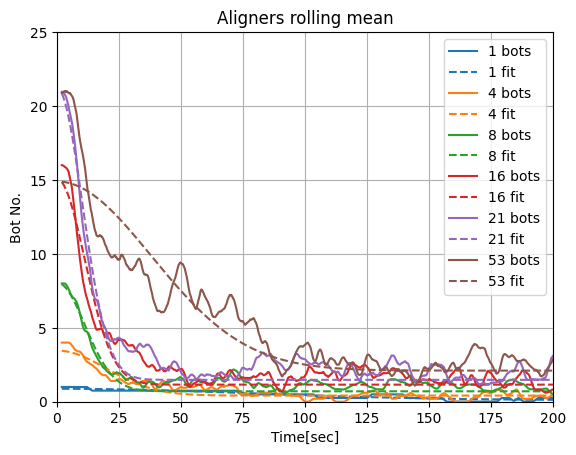

In [38]:
I=25*2
fig = plt.figure()
ax = plt.axes()
#ax.set_xscale("log")
ksss_align = []
ksss_err_align=[]
half_time_align=[]
half_time_err_align=[]
for i in [1,4,8,16,21,53]:
#for i in [21]:
    current_data=aligners_mean.loc[i]
    current_data_std=aligners_std.loc[i]
    alingers_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    alingers_count_mean_window=alingers_count_mean_window.dropna()
    t=(alingers_count_mean_window.index.values)/25
    #x=np.arange(len(alingers_count_mean_window))
    p0=np.array([i,80,2])
    popt,pcov = sc.optimize.curve_fit(expShift,t,alingers_count_mean_window,p0=[i,80,2])
    perr = np.sqrt(np.diag(pcov))
    corr=np.corrcoef(pcov,rowvar=True)
    #print(alingers_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(t,alingers_count_mean_window,label='{:d} bots'.format(i),color=color)
    plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
    cond_half=alingers_count_mean_window<=(i/2)
    cond_half_data=alingers_count_mean_window[cond_half]
    t_half_life=popt[1]*np.sqrt(np.log(2))
    kissingStart = int(t_half_life*25*3)
    kissingStop = int(t_half_life*25*12)
    print(kissingStop/25)
    Kss_data=alingers_count_mean_window.iloc[kissingStart:kissingStop]
    ksss_align.append(Kss_data.mean())
    ksss_err_align.append(Kss_data.std()/2)
    half_time_align.append(popt[1]*np.sqrt(np.log(2)))
    half_time_err_align.append(perr[1]*np.sqrt(np.log(2)))
    ax.legend()
    file_path=path+'\\results\\aligners\\{}_bots'.format(i)
    isExist = os.path.exists(file_path)
    if not isExist:

   # Create a new directory because it does not exist
        os.makedirs(file_path)
    data_fit['t']=t
    data_fit['fronters_count']=fronters_count_mean_window
    data_fit['fit']=expShift(t,*popt)
    data_fit.to_csv(file_path+'\\data_fit.csv'.format(i))
    popt.tofile(file_path+'\\popt.csv'.format(i))
    p0.tofile(file_path+'\\p0.csv'.format(i))
    pcov.tofile(file_path+'\\pcov.csv'.format(i))
    corr.tofile(file_path+'\\corr.csv'.format(i))
    data_fit=pd.DataFrame()
    
plt.title('Aligners rolling mean')
plt.xlabel('Time[sec]')
plt.ylabel('Bot No.')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,2E2,0,25])
plt.grid()

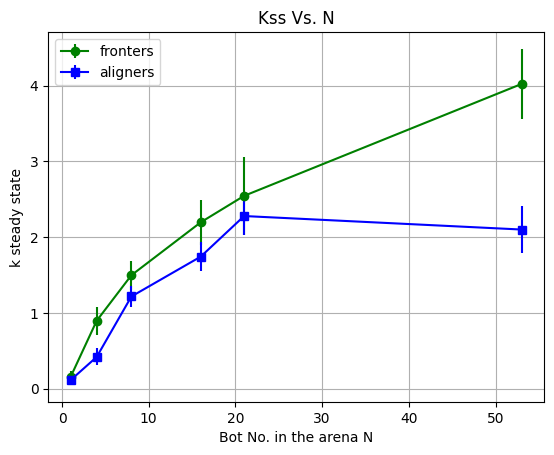

In [40]:
path_figure=path+'\\results'
fig = plt.figure()
ax = plt.axes()
ksss_fron = np.array(ksss_fron)
Ns = np.array(Ns)
ksss_align=np.array(ksss_align)
ksss_err_fron=np.array(ksss_err_fron)
ksss_err_align=np.array(ksss_err_align)
ax.errorbar(x=Ns,y=ksss_fron,yerr=ksss_err_fron,label='fronters',marker='o',color='green')
ax.errorbar(x=Ns,y=ksss_align,yerr=ksss_err_align,label='aligners',marker='s',color='blue')
ax.legend()
ax.grid()
plt.xlabel('Bot No. in the arena N')
plt.ylabel('k steady state')
plt.title('Kss Vs. N')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\Kss_vs_N.png',bbox_inches='tight')
data=pd.DataFrame()
data['x_fronters [Bot No. in arena]']=Ns
data['y_fronters_k_steady_state']=ksss_fron
data['fronter_error']=ksss_err_fron
data['x_aligners[Bot No. in arena]']=Ns
data['y_aligners_k_steady_state']=ksss_align
data['aligner error']=ksss_err_align
data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\Kss_vs_N.csv')

Text(0.5, 1.0, 't half life Vs. N')

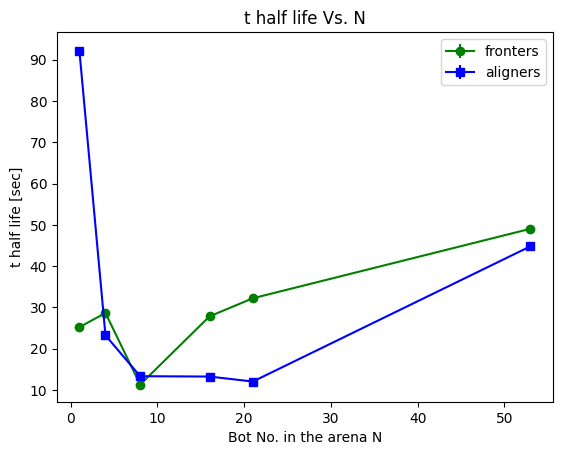

In [33]:
fig = plt.figure()
ax2 = plt.axes()
half_time_fron=np.array(half_time_fron)
half_time_err_fron=np.array(half_time_err_fron)
half_time_align=np.array(half_time_align)
half_time_err_align=np.array(half_time_err_align)
ax2.errorbar(x=Ns,y=half_time_fron,yerr=half_time_err_fron,label='fronters',marker='o',color='green')
ax2.errorbar(x=Ns,y=half_time_align,yerr=half_time_err_align,label='aligners',marker='s',color='blue')
ax2.legend()
plt.xlabel('Bot No. in the arena N')
plt.ylabel('t half life [sec]')
plt.title('t half life Vs. N')

# I=25*60
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
fronters_count_mean_window=fronter_mean.rolling(I).mean()
fronters_count_std_window=fronter_std.rolling(I).mean()
alingers_count_mean_window=alingers_mean.rolling(I).mean()
alingers_count_std_window=alingers_std.rolling(I).mean()
ax.errorbar(list(range(0,len(alingers_count_mean_window))),alingers_count_mean_window,color='cyan',yerr=alingers_count_std_window,ecolor='pink',alpha=0.4)
ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,10])